In [1]:
import folium
from geopy.distance import geodesic

# Latitude and longitude for Crescent City, CA and Monterey, CA
crescent_city_coords = (41.7547, -124.2026)
monterey_coords = (36.6002, -121.8947)
cc_lat= 41.7547
m_lat= 36.6002
# Calculate the distance between the two locations
distance = geodesic(crescent_city_coords, monterey_coords).miles

# Create a folium map centered between the two locations
m = folium.Map(location=[(crescent_city_coords[0] + monterey_coords[0]) / 2, (crescent_city_coords[1] + monterey_coords[1]) / 2], zoom_start=6)

# Add markers for Crescent City and Monterey
folium.Marker(crescent_city_coords, tooltip="Crescent City, CA").add_to(m)
folium.Marker(monterey_coords, tooltip="Monterey, CA").add_to(m)

# Create a line between the two locations to show the distance
line = folium.PolyLine([crescent_city_coords, monterey_coords], color='blue', weight=2, opacity=1)
line.add_to(m)

# Display the distance as a tooltip on the line
line.add_child(folium.Tooltip(f"Distance: {distance:.2f} miles"))

# Display the map
m.save('geospatial_distance_map.html')
# Installed Python equivalent of MATLAB's TTIDE to import PYTHON's UTIDE
!pip install utide
import utide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path_to_file = "C:\\Users\\cbeau\\Downloads\\WATER LEVELS CRESENT CITY.csv"
Tide_Crescent_City_Ca = pd.read_csv(path_to_file)

path_to_file2 = "C:\\Users\\cbeau\\Downloads\\WATER LEVELS MONTEREY.csv"
Tide_Monterey_Ca = pd.read_csv(path_to_file2)

# Separate Date Column into year, month, day columns
Tide_Crescent_City_Ca['year'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.year
Tide_Crescent_City_Ca['month'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.month
Tide_Crescent_City_Ca['day'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.day

# Split 'Time (GMT)' into 'hour,' 'minute,' and 'second' columns
Tide_Crescent_City_Ca['hour'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.hour
Tide_Crescent_City_Ca['minute'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.minute
Tide_Crescent_City_Ca['second'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.second

# Combine 'year,' 'month,' 'day,' 'hour,' 'minute,' and 'second' into a datetime column
Tide_Crescent_City_Ca['datetime'] = pd.to_datetime(Tide_Crescent_City_Ca[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Separate Date Column into year, month, day columns
Tide_Monterey_Ca['year'] = pd.to_datetime(Tide_Monterey_Ca['Date']).dt.year
Tide_Monterey_Ca['month'] = pd.to_datetime(Tide_Monterey_Ca['Date']).dt.month
Tide_Monterey_Ca['day'] = pd.to_datetime(Tide_Monterey_Ca['Date']).dt.day

# Split 'Time (GMT)' into 'hour,' 'minute,' and 'second' columns
Tide_Monterey_Ca['hour'] = pd.to_datetime(Tide_Monterey_Ca['Time (GMT)']).dt.hour
Tide_Monterey_Ca['minute'] = pd.to_datetime(Tide_Monterey_Ca['Time (GMT)']).dt.minute
Tide_Monterey_Ca['second'] = pd.to_datetime(Tide_Monterey_Ca['Time (GMT)']).dt.second

# Combine 'year,' 'month,' 'day,' 'hour,' 'minute,' and 'second' into a datetime column
Tide_Monterey_Ca['datetime'] = pd.to_datetime(Tide_Monterey_Ca[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Extract relevant columns
crescent_city_data = Tide_Crescent_City_Ca[['datetime', 'Verified (ft)']]
monterey_data = Tide_Monterey_Ca[['datetime', 'Verified (ft)']]

# Detrend the water level data for Crescent City
crescent_city_data['Verified (ft)'] = crescent_city_data['Verified (ft)'] - crescent_city_data['Verified (ft)'].mean()


# Perform tidal analysis for Crescent City
crescent_city_result = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat)

# Detrend the water level data for Monterey
monterey_data['Verified (ft)'] = monterey_data['Verified (ft)'] - monterey_data['Verified (ft)'].mean()

# Perform tidal analysis for Monterey
monterey_result = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=m_lat)
print ('Monterey Result', monterey_result)

C:\Users\cbeau\anaconda3\Lib\site-packages\utide\harmonics.py:16: RuntimeWarning: invalid value encountered in cast
  nshallow = np.ma.masked_invalid(const.nshallow).astype(int)
C:\Users\cbeau\anaconda3\Lib\site-packages\utide\harmonics.py:17: RuntimeWarning: invalid value encountered in cast
  ishallow = np.ma.masked_invalid(const.ishallow).astype(int) - 1
C:\Users\cbeau\AppData\Local\Temp\ipykernel_9292\682131222.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crescent_city_data['Verified (ft)'] = crescent_city_data['Verified (ft)'] - crescent_city_data['Verified (ft)'].mean()


solve: matrix prep ... solution ... done.
solve: matrix prep ... 

C:\Users\cbeau\AppData\Local\Temp\ipykernel_9292\682131222.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monterey_data['Verified (ft)'] = monterey_data['Verified (ft)'] - monterey_data['Verified (ft)'].mean()


solution ... done.
Monterey Result A       : [1.61113215e+00 1.17682396e+00 7.30365505e-01 4.72914482e-01
 4.34620173e-01 1.57478517e-01 9.79316770e-02 8.89553243e-02
 7.69177931e-02 4.84642733e-02 3.57338459e-02 1.07182691e-02
 1.02432066e-02 5.79166905e-03 4.35210270e-03 3.93021573e-03
 3.86926399e-03 3.83797535e-03 3.79325699e-03 2.84112665e-03
 2.65456220e-03 1.76806112e-03 1.49272334e-03 1.34197436e-03
 1.29385198e-03 8.68331008e-04 8.14887667e-04 8.03130106e-04
 6.35663743e-04]
A_ci    : [0.02728414 0.00383336 0.00383285 0.02727268 0.02728786 0.00383289
 0.0038326  0.00383319 0.09258151 0.00383456 0.00383364 0.00383299
 0.00228727 0.02727045 0.00228641 0.00228645 0.00110013 0.00115755
 0.00228644 0.00110036 0.00091027 0.00110044 0.00091059 0.00110006
 0.00091075 0.00067376 0.00062251 0.00115758 0.00091063]
PE      : [5.21355589e+01 2.78160020e+01 1.07140140e+01 4.49197086e+00
 3.79394878e+00 4.98097468e-01 1.92627410e-01 1.58933555e-01
 1.18829791e-01 4.71753480e-02 2.56466842e-0

solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ..

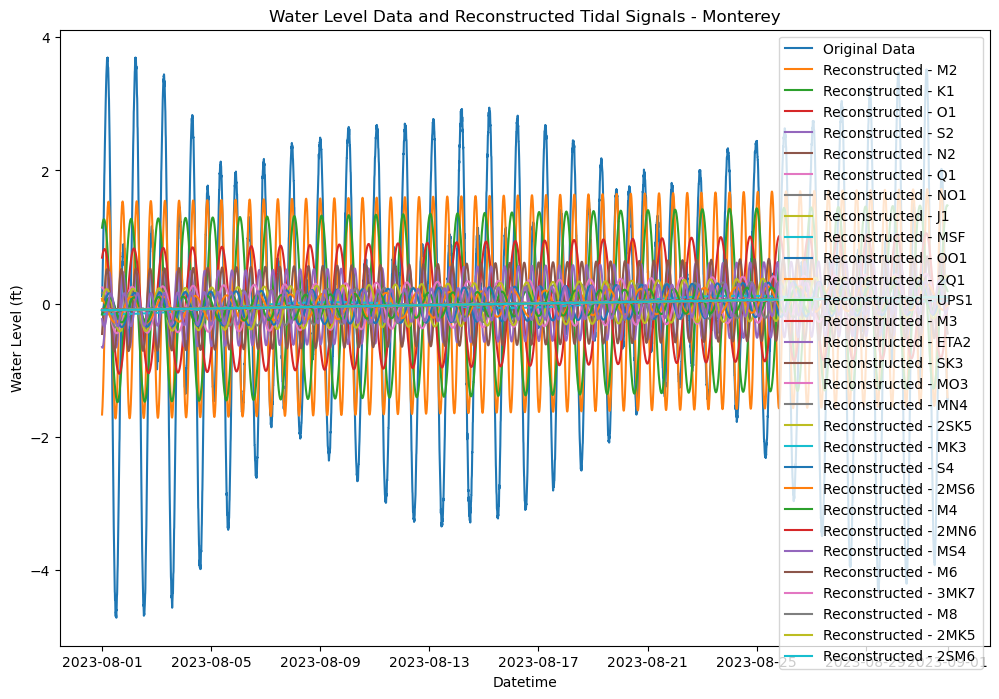

solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: M2
Residual Error: 0       1.778445
1       1.803774
2       1.815159
3       1.842674
4       1.926401
          ...   
7435   -0.007095
7436    0.007575
7437   -0.031312
7438   -0.093858
7439   -0.020161
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 1.595577
Original Data Variance: 2.922961
Skill Score: 0.454123
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: K1
Residual Error: 0      -1.027435
1      -0.992111
2      -0.965916
3      -0.918840
4      -0.810875
          ...   
7435   -2.735604
7436   -2.766076
7437   -2.845599
7438   -2.944174
7439   -2.901802
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 1.971050
Original Data Variance: 2.922961
Skill Score: 0.325667
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: O1
Residual Error: 0      -0.577608
1      -0.538955
2      -0.509817
3      -0.460186
4   

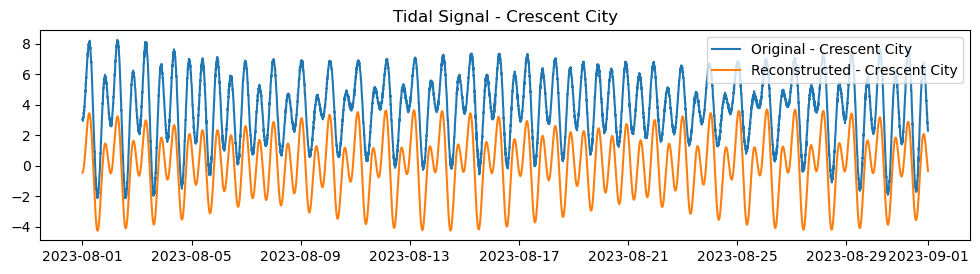

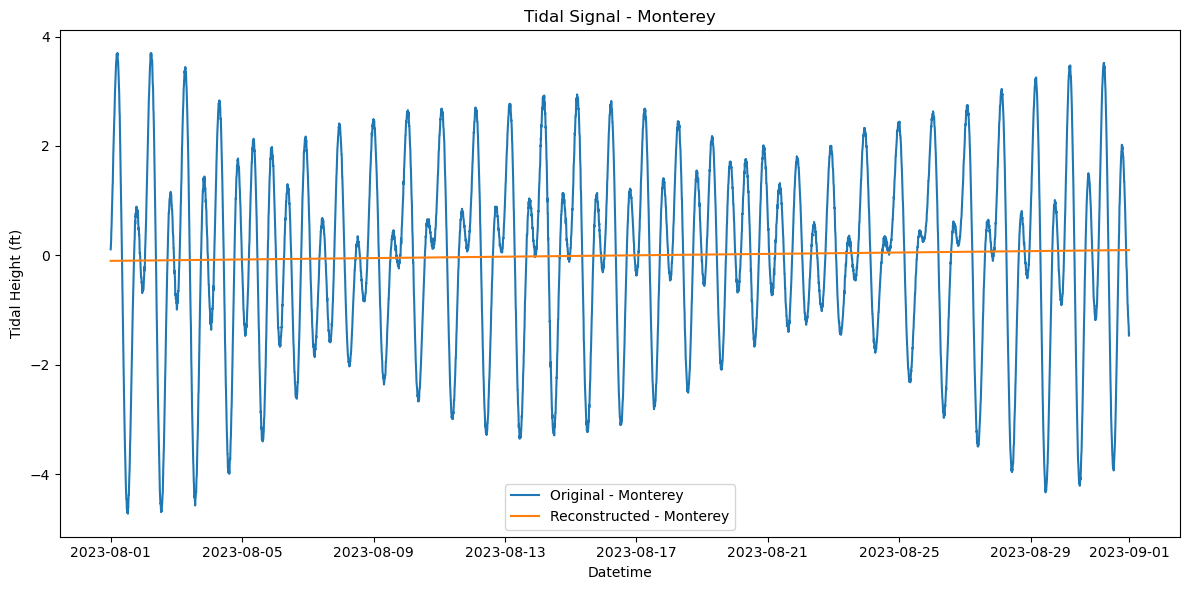

In [3]:
#######################################################################################################
# consituents for utide.solve function ['M2', 'K1', 'O1', 'S2', 'N2', 'Q1', 'NO1', 'J1', 'MSF', 'OO1',
#'2Q1', 'UPS1', 'M3', 'ETA2', 'SK3', 'MO3', 'MN4', '2SK5', 'MK3',
#'S4', '2MS6', 'M4', '2MN6', 'MS4', 'M6', '3MK7', 'M8', '2MK5', '2SM6']
#trying to identify significant constituents

# List of constituents
constituents_list = ['M2', 'K1', 'O1', 'S2', 'N2', 'Q1', 'NO1', 'J1', 'MSF', 'OO1',
                     '2Q1', 'UPS1', 'M3', 'ETA2', 'SK3', 'MO3', 'MN4', '2SK5', 'MK3',
                     'S4', '2MS6', 'M4', '2MN6', 'MS4', 'M6', '3MK7', 'M8', '2MK5', '2SM6']

# Dictionary to store reconstructed tidal signals for each constituent
reconstructed_tides = {}

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for Monterey for the specific constituent
    monterey_result = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=m_lat, constit=[constituent])

    # Reconstruct tidal signal for Monterey for the specific constituent
    monterey_tide = utide.reconstruct(monterey_data['datetime'], monterey_result, constit=[constituent])

    # Store the reconstructed tidal signal in the dictionary
    reconstructed_tides[constituent] = monterey_tide['h']

# Plot original water level data and reconstructed tidal signals for each constituent
plt.figure(figsize=(12, 8))
plt.plot(monterey_data['datetime'], monterey_data['Verified (ft)'], label='Original Data')

for constituent, tide_signal in reconstructed_tides.items():
    plt.plot(monterey_data['datetime'], tide_signal, label=f'Reconstructed - {constituent}')

plt.title('Water Level Data and Reconstructed Tidal Signals - Monterey')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()
##########################################################################################
#trying to identify signifcant constituents with Skill Score
# Dictionary to store results for each constituent
#If SS is close to 1, it means that the variance of the residual errors is small compared to the variance of the original data, 
#indicating a good performance of the model
#skill score threshold
threshold = .1
# Initialize results_dict
results_dict = {}
# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for Monterey for the specific constituent
    monterey_result = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=m_lat, constit=[constituent])

    # Reconstruct tidal signal for Monterey for the specific constituent
    monterey_tide = utide.reconstruct(monterey_data['datetime'], monterey_result, constit=[constituent])

    # Calculate the residual error for each constituent
    residual_error = monterey_data['Verified (ft)'] - monterey_tide['h']

    # Calculate the variance of the error for each constituent
    error_variance = np.var(residual_error)

    # Calculate the variance of the original data
    original_data_variance = np.var(monterey_data['Verified (ft)'])

    # Calculate the skill score for each constituent
    skill_score = 1 - (error_variance / original_data_variance)

    # Store the results in the dictionary
    results_dict[constituent] = {
        'Residual Error': residual_error,
        'Variance of Error': error_variance,
        'Original Data Variance': original_data_variance,
        'Skill Score': skill_score
    }

    # Print the results for each constituent
    print(f"\nConstituent: {constituent}")
    print(f"Residual Error: {residual_error}")
    print(f"Variance of Error: {error_variance:.6f}")
    print(f"Original Data Variance: {original_data_variance:.6f}")
    print(f"Skill Score: {skill_score:.6f}")

# Identify the most significant constituents based on the skill score
most_significant_constituents = [constituent for constituent, results in results_dict.items() if results['Skill Score'] > threshold]
print(f"\nMost Significant Constituents based on Skill Score: {most_significant_constituents}")
#######################################################################################
#trying toidentify significant consitutents with amplitutde to error ratios
# Dictionary to store results for each constituent
results_dict1 = {}

# Threshold for considering amplitude as significantly larger than the error

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for Monterey for the specific constituent
    monterey_result = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=m_lat, constit=[constituent])

    # Reconstruct tidal signal for Monterey for the specific constituent
    monterey_tide = utide.reconstruct(monterey_data['datetime'], monterey_result, constit=[constituent])

    # Calculate the residual error for each constituent
    residual_error = monterey_data['Verified (ft)'] - monterey_tide['h']

    # Calculate the amplitude, error, and amplitude-to-error ratio for each constituent
    amplitude = monterey_result['A'][0]  # Amplitude of the primary constituent
    error = monterey_result['g_ci'][0]  # Error of the primary constituent
    ratio_amplitude_to_error = amplitude / error

    # Store the results in the dictionary
    results_dict1[constituent] = {
        'Residual Error': residual_error,
        'Amplitude': amplitude,
        'Error': error,
        'Amplitude-to-Error Ratio': ratio_amplitude_to_error
    }

    # Print the results for each constituent
    print(f"\nConstituent: {constituent}")
    print(f"Residual Error: {residual_error}")
    print(f"Amplitude: {amplitude:.6f}")
    print(f"Error: {error:.6f}")
    print(f"Amplitude-to-Error Ratio: {ratio_amplitude_to_error:.6f}")

# Identify the most significant constituents based on amplitude-to-error ratio

#####################################################################################
# consituents for utide.solve function ['M2', 'K1', 'O1', 'S2', 'N2', 'Q1', 'NO1', 'J1', 'MSF', 'OO1',
#'2Q1', 'UPS1', 'M3', 'ETA2', 'SK3', 'MO3', 'MN4', '2SK5', 'MK3',
#'S4', '2MS6', 'M4', '2MN6', 'MS4', 'M6', '3MK7', 'M8', '2MK5', '2SM6']
#identified significant consitutents from the code above to be M2,K1, and 01
# reconstructing tide data from these significant constituents
constituents = ['M2', 'K1', 'O1']

# Reconstruct tidal signal for Crescent City using only M2, K1, and O1
tide_cc_reconstructed = utide.reconstruct(crescent_city_data['datetime'], crescent_city_result, constit=constituents)

# Reconstruct tidal signal for Monterey using only M2, K1, and O1
tide_m_reconstructed = utide.reconstruct(monterey_data['datetime'], monterey_result, constit=constituents)

print('Monterey Result', tide_m_reconstructed)
print('Monterey Reconstructed Tidal Signal:', tide_m_reconstructed['h'][:5])


print(tide_cc_reconstructed)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(Tide_Crescent_City_Ca['datetime'], Tide_Crescent_City_Ca['Verified (ft)'], label='Original - Crescent City')
plt.plot(Tide_Crescent_City_Ca['datetime'], tide_cc_reconstructed['h'], label='Reconstructed - Crescent City')
plt.title('Tidal Signal - Crescent City')
plt.legend()






#############################################################################





##########################################################################################################

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utide

# Function to calculate truncated Fourier series matrix H and perform least-squares
def perform_least_squares(data, lat, constituents):
    N = len(data)  # Number of data points
    t = data['datetime'].values.astype(np.float64)  # Time in float64 format

    # Construct the matrix H
    H = construct_fourier_matrix(t, constituents)

    # Define the observed water level vector eta
    eta = data['Verified (ft)'].values

    # Use least-squares to find the best-fit coefficients
    coefficients, residuals, rank, s = np.linalg.lstsq(H, eta, rcond=None)

    # Calculate the inverse covariance matrix C^(-1)
    covariance_matrix_inverse = np.linalg.inv(np.dot(H.T, H))

    return coefficients, residuals, covariance_matrix_inverse

# Function to construct Fourier matrix
def construct_fourier_matrix(t, constituents):
    # Initialize an empty matrix
    H = np.empty((len(t), 0))

    # Manual definition of tidal frequencies (M2, K1, O1)
    tidal_frequencies = {'M2': 1.93227e-4, 'K1': 7.29212e-5, 'O1': 6.75977e-5}

    # Add cos and sin terms for each constituent
    for constituent in constituents:
        freq = tidal_frequencies[constituent]
        omega = 2 * np.pi / freq
        H = np.column_stack((H, np.cos(omega * t), np.sin(omega * t)))

    return H

# Latitude for Crescent City and Monterey
cc_lat = 41.7547
m_lat = 36.6002

# List of significant constituents
constituents = ['M2', 'K1', 'O1']

# Perform least-squares for Crescent City
cc_coefficients, cc_residuals, cc_covariance_matrix_inverse = perform_least_squares(crescent_city_data, cc_lat, constituents)

# Perform least-squares for Monterey
m_coefficients, m_residuals, m_covariance_matrix_inverse = perform_least_squares(monterey_data, m_lat, constituents)

# Print results for Crescent City
print('Crescent City Results:')
print('Best-fit coefficients:', cc_coefficients)
print('Residuals:', cc_residuals)
print('Inverse Covariance Matrix (C^(-1)):', cc_covariance_matrix_inverse)

# Print results for Monterey
print('\nMonterey Results:')
print('Best-fit coefficients:', m_coefficients)
print('Residuals:', m_residuals)
print('Inverse Covariance Matrix (C^(-1)):', m_covariance_matrix_inverse)


Crescent City Results:
Best-fit coefficients: [ 3.88033066e-05  7.82712587e-04 -6.03574549e-03  2.84360510e-03
 -5.60077453e-04 -3.48964106e-03]
Residuals: [35005.98301258]
Inverse Covariance Matrix (C^(-1)): [[ 2.68886055e-04  9.53722800e-08 -1.41505376e-07  1.26866432e-07
  -7.55435293e-07  3.11374846e-07]
 [ 9.53722800e-08  2.68751532e-04 -2.84807521e-08  2.38184704e-08
   1.75848097e-07 -3.00869979e-07]
 [-1.41505376e-07 -2.84807521e-08  2.68656993e-04  1.37728161e-07
  -6.72545131e-07  1.73436846e-07]
 [ 1.26866432e-07  2.38184704e-08  1.37728161e-07  2.68981417e-04
  -1.14421878e-07 -6.71772886e-07]
 [-7.55435293e-07  1.75848097e-07 -6.72545131e-07 -1.14421878e-07
   2.68884000e-04 -5.92070693e-09]
 [ 3.11374846e-07 -3.00869979e-07  1.73436846e-07 -6.71772886e-07
  -5.92070693e-09  2.68756898e-04]]

Monterey Results:
Best-fit coefficients: [-0.00226348  0.00108525 -0.00625908  0.00362393 -0.00047073 -0.00106238]
Residuals: [21746.60978738]
Inverse Covariance Matrix (C^(-1)): [[ 2

Missing Values:
 datetime         0
Verified (ft)    0
dtype: int64
Min Tidal Height: -1.39
Max Tidal Height: 7.02
Time Gaps:
 0   NaT
Name: datetime, dtype: timedelta64[ns]


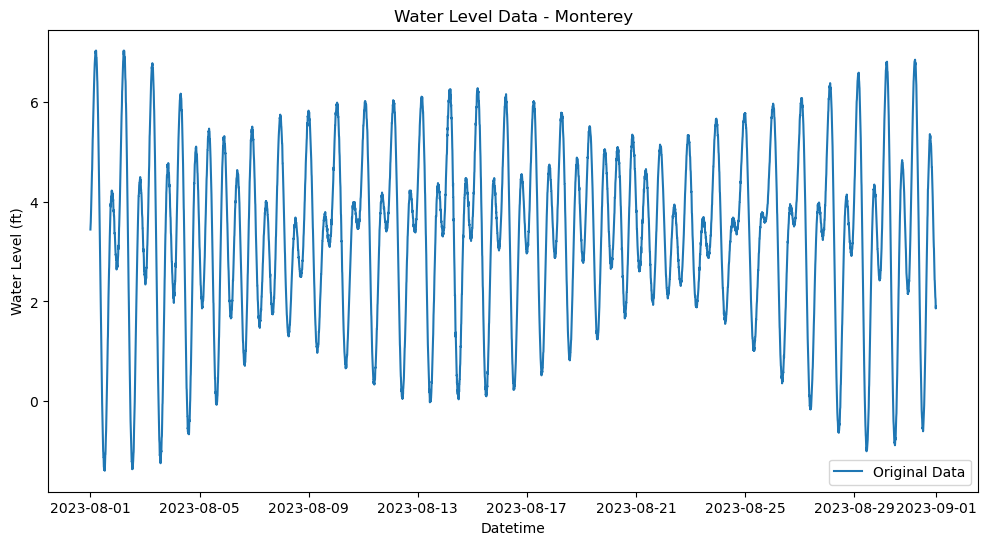

solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.


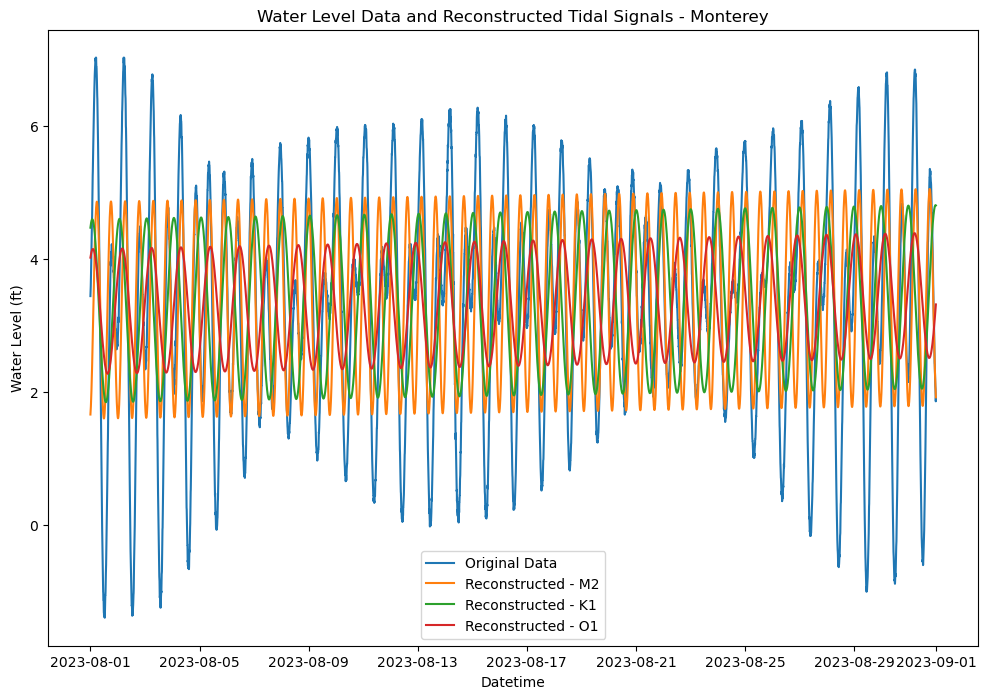

solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: M2
Residual Error: 0       1.778445
1       1.803774
2       1.815159
3       1.842674
4       1.926401
          ...   
7435   -0.007095
7436    0.007575
7437   -0.031312
7438   -0.093858
7439   -0.020161
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 1.595577
Original Data Variance: 2.922961
Skill Score: 0.454123
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: K1
Residual Error: 0      -1.027435
1      -0.992111
2      -0.965916
3      -0.918840
4      -0.810875
          ...   
7435   -2.735604
7436   -2.766076
7437   -2.845599
7438   -2.944174
7439   -2.901802
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 1.971050
Original Data Variance: 2.922961
Skill Score: 0.325667
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: O1
Residual Error: 0      -0.577608
1      -0.538955
2      -0.509817
3      -0.460186
4   

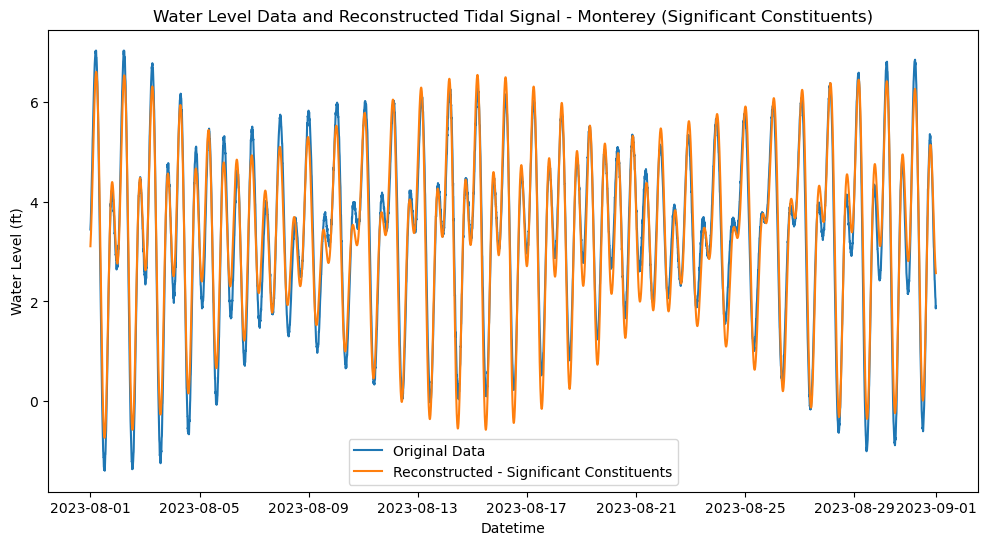

Residual Error (Significant Constituents): 0       0.335012
1       0.340844
2       0.332746
3       0.340794
4       0.405079
          ...   
7435   -0.620788
7436   -0.613672
7437   -0.660543
7438   -0.731521
7439   -0.666718
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error (Significant Constituents): 0.160076


In [38]:

import utide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##The residual error represents the difference between the observed data and the reconstructed tidal signal
#the variance of the error provides a measure of how much the error values vary.

# Check for missing values in the input data
missing_values = monterey_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for outliers in tidal heights
min_tidal_height = monterey_data['Verified (ft)'].min()
max_tidal_height = monterey_data['Verified (ft)'].max()
print("Min Tidal Height:", min_tidal_height)
print("Max Tidal Height:", max_tidal_height)

# Check for time gaps in the data
time_gaps = monterey_data['datetime'].diff().loc[monterey_data['datetime'].diff() != pd.Timedelta('6T')]
print("Time Gaps:\n", time_gaps)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(monterey_data['datetime'], monterey_data['Verified (ft)'], label='Original Data')
plt.title('Water Level Data - Monterey')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()

# List of tidal constituents to analyze
constituents_list = ['M2', 'K1', 'O1']

# Dictionary to store reconstructed tidal signals for each constituent
reconstructed_tides = {}

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for Monterey for the specific constituent
    monterey_result = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=36.6, constit=[constituent])

    # Reconstruct tidal signal for Monterey for the specific constituent
    monterey_tide = utide.reconstruct(monterey_data['datetime'], monterey_result, constit=[constituent])

    # Store the reconstructed tidal signal in the dictionary
    reconstructed_tides[constituent] = monterey_tide['h']

# Plot original water level data and reconstructed tidal signals for each constituent
plt.figure(figsize=(12, 8))
plt.plot(monterey_data['datetime'], monterey_data['Verified (ft)'], label='Original Data')

for constituent, tide_signal in reconstructed_tides.items():
    plt.plot(monterey_data['datetime'], tide_signal, label=f'Reconstructed - {constituent}')

plt.title('Water Level Data and Reconstructed Tidal Signals - Monterey')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()

# Skill Score Analysis
threshold = 0.1  # Skill score threshold
results_dict = {}

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for Monterey for the specific constituent
    monterey_result = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=36.6, constit=[constituent])

    # Reconstruct tidal signal for Monterey for the specific constituent
    monterey_tide = utide.reconstruct(monterey_data['datetime'], monterey_result, constit=[constituent])

    # Calculate the residual error for each constituent
    residual_error = monterey_data['Verified (ft)'] - monterey_tide['h']

    # Calculate the variance of the error for each constituent
    error_variance = np.var(residual_error)

    # Calculate the variance of the original data
    original_data_variance = np.var(monterey_data['Verified (ft)'])

    # Calculate the skill score for each constituent
    skill_score = 1 - (error_variance / original_data_variance)

    # Store the results in the dictionary
    results_dict[constituent] = {
        'Residual Error': residual_error,
        'Variance of Error': error_variance,
        'Original Data Variance': original_data_variance,
        'Skill Score': skill_score
    }

    # Print the results for each constituent
    print(f"\nConstituent: {constituent}")
    print(f"Residual Error: {residual_error}")
    print(f"Variance of Error: {error_variance:.6f}")
    print(f"Original Data Variance: {original_data_variance:.6f}")
    print(f"Skill Score: {skill_score:.6f}")

# Identify the most significant constituents based on the skill score
most_significant_constituents = [constituent for constituent, results in results_dict.items() if results['Skill Score'] > threshold]
print(f"\nMost Significant Constituents based on Skill Score: {most_significant_constituents}")

# List of significant constituents
significant_constituents = ['M2', 'K1', 'O1','S2']

# Perform tidal analysis for Monterey using the significant constituents
monterey_result_significant = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=m_lat, constit=significant_constituents)

# Reconstruct tidal signal for Monterey using the significant constituents
monterey_tide_significant = utide.reconstruct(monterey_data['datetime'], monterey_result_significant, constit=significant_constituents)

###########################################################################
#CI
# Access amplitude and phase estimates
amplitudes = monterey_result_significant['A']
phases = monterey_result_significant['g']

# Calculate standard errors
amp_se = monterey_result_significant['A_ci'] / 1.96  # 1.96 is the critical value for a 95% confidence interval
phase_se = monterey_result_significant['g_ci'] / 1.96

# Calculate confidence intervals
amplitude_ci = np.column_stack((amplitudes - amp_se, amplitudes + amp_se))
phase_ci = np.column_stack((phases - phase_se, phases + phase_se))

# Print confidence intervals
for i, constituent in enumerate(significant_constituents):
    print(f"Confidence Intervals for {constituent} in Monterey:")
    print("Amplitude Lower:", amplitude_ci[i, 0])
    print("Amplitude Upper:", amplitude_ci[i, 1])
    print("Phase Lower:", phase_ci[i, 0])
    print("Phase Upper:", phase_ci[i, 1])
    print()
    
# Plot original water level data and reconstructed tidal signal using significant constituents
plt.figure(figsize=(12, 6))
plt.plot(monterey_data['datetime'], monterey_data['Verified (ft)'], label='Original Data')
plt.plot(monterey_data['datetime'], monterey_tide_significant['h'], label='Reconstructed - Significant Constituents')

plt.title('Water Level Data and Reconstructed Tidal Signal - Monterey (Significant Constituents)')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')

plt.legend()
plt.show()

# Calculate the residual error for each constituent
residual_error_significant = monterey_data['Verified (ft)'] - monterey_tide_significant['h']

# Calculate the variance of the error for the significant constituents
error_variance_significant = np.var(residual_error_significant)

# Print the results for the significant constituents
print(f"Residual Error (Significant Constituents): {residual_error_significant}")
print(f"Variance of Error (Significant Constituents): {error_variance_significant:.6f}")


C:\Users\cbeau\AppData\Local\Temp\ipykernel_23072\2587181369.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crescent_city_data['Verified (ft)'] = crescent_city_data['Verified (ft)'] - crescent_city_data['Verified (ft)'].mean()


solve: matrix prep ... solution ... done.
Missing Values:
 datetime         0
Verified (ft)    0
dtype: int64
Min Tidal Height: -5.940317204301076
Max Tidal Height: 4.4596827956989245
Time Gaps:
 0   NaT
Name: datetime, dtype: timedelta64[ns]


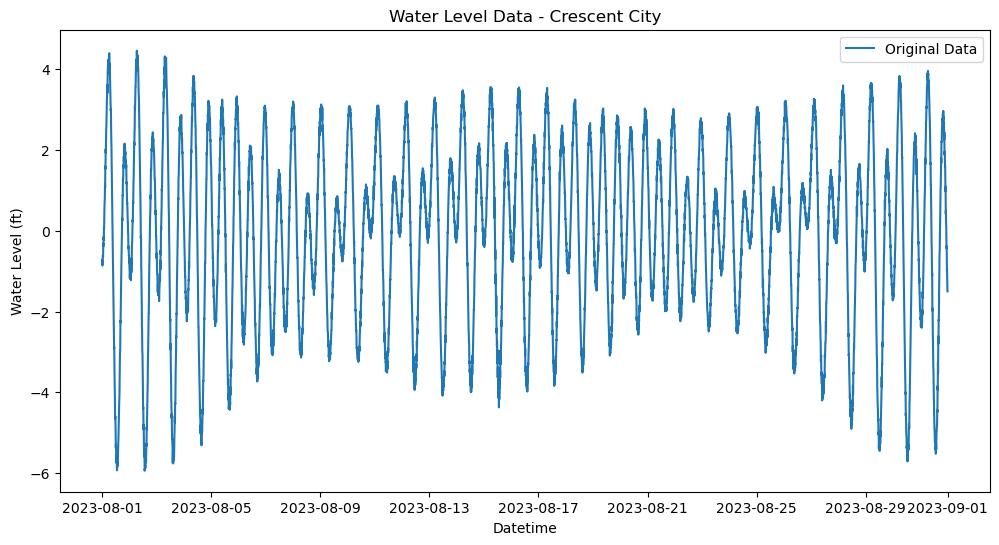

solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.


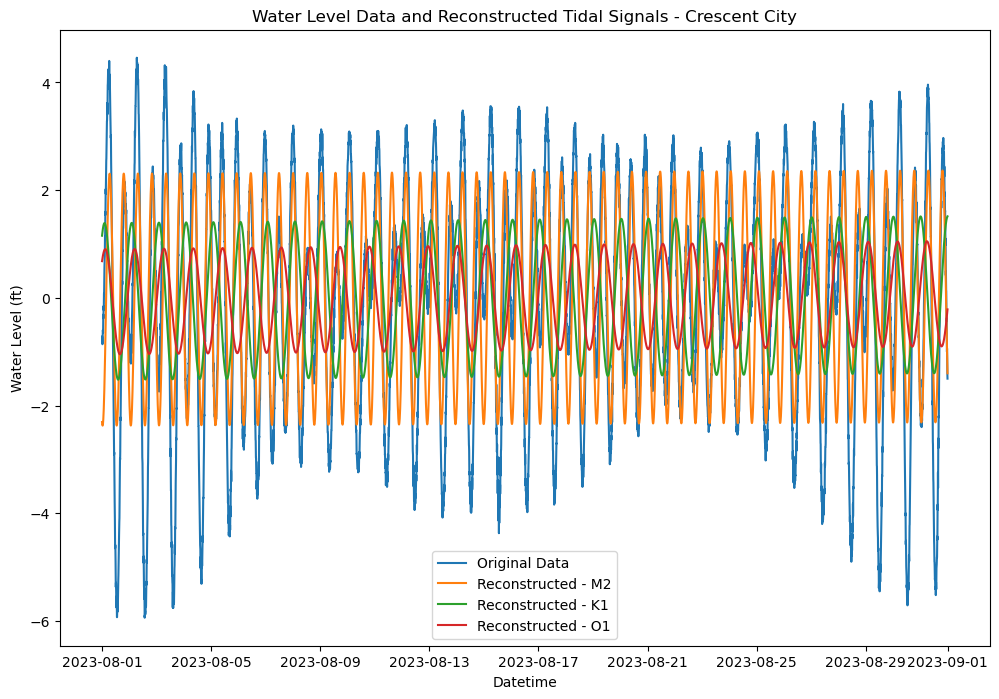

solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: M2
Residual Error: 0       1.585942
1       1.610992
2       1.550162
3       1.503404
4       1.510684
          ...   
7435    0.059781
7436   -0.075317
7437   -0.223312
7438   -0.124463
7439   -0.099025
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 1.971262
Original Data Variance: 4.705134
Skill Score: 0.581040
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: K1
Residual Error: 0      -1.874533
1      -1.894917
2      -1.994445
3      -2.073104
4      -2.090882
          ...   
7435   -2.435555
7436   -2.681541
7437   -2.936532
7438   -2.940527
7439   -3.013521
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 3.641965
Original Data Variance: 4.705134
Skill Score: 0.225959
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: O1
Residual Error: 0      -1.402113
1      -1.416980
2      -1.511390
3      -1.585336
4   

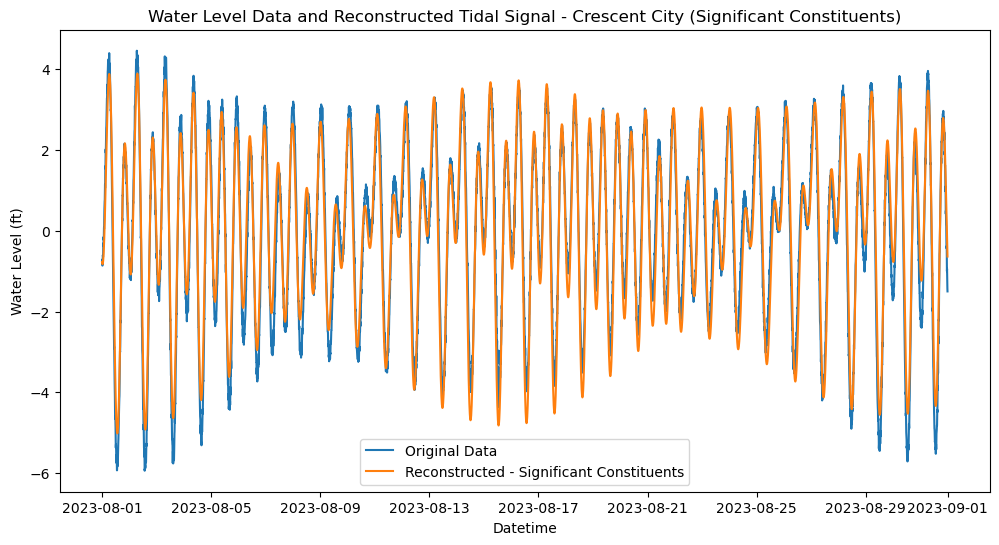

Residual Error (Significant Constituents): 0       0.050073
1       0.072200
2       0.008820
3      -0.040177
4      -0.034885
          ...   
7435   -0.748394
7436   -0.872875
7437   -1.010024
7438   -0.900180
7439   -0.863671
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error (Significant Constituents): 0.276570


In [37]:
import utide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#The residual error represents the difference between the observed data and the reconstructed tidal signal
#the variance of the error provides a measure of how much the error values vary.

# Path to the CSV file
path_to_file = "C:\\Users\\cbeau\\Downloads\\WATER LEVELS CRESENT CITY.csv"
Tide_Crescent_City_Ca = pd.read_csv(path_to_file)
# Separate Date Column into year, month, day columns
Tide_Crescent_City_Ca['year'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.year
Tide_Crescent_City_Ca['month'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.month
Tide_Crescent_City_Ca['day'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.day

# Split 'Time (GMT)' into 'hour,' 'minute,' and 'second' columns
Tide_Crescent_City_Ca['hour'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.hour
Tide_Crescent_City_Ca['minute'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.minute
Tide_Crescent_City_Ca['second'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.second

# Combine 'year,' 'month,' 'day,' 'hour,' 'minute,' and 'second' into a datetime column
Tide_Crescent_City_Ca['datetime'] = pd.to_datetime(Tide_Crescent_City_Ca[['year', 'month', 'day', 'hour', 'minute', 'second']])


# Extract relevant columns
crescent_city_data = Tide_Crescent_City_Ca[['datetime', 'Verified (ft)']]

# Detrend the water level data for Crescent City
crescent_city_data['Verified (ft)'] = crescent_city_data['Verified (ft)'] - crescent_city_data['Verified (ft)'].mean()

# Perform tidal analysis for Crescent City
# Assuming cc_lat is defined somewhere in your script
cc_lat = 41.7547  # Replace with the actual latitude value
crescent_city_result = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat)

# Check for missing values in the input data
missing_values = crescent_city_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for outliers in tidal heights
min_tidal_height = crescent_city_data['Verified (ft)'].min()
max_tidal_height = crescent_city_data['Verified (ft)'].max()
print("Min Tidal Height:", min_tidal_height)
print("Max Tidal Height:", max_tidal_height)

# Check for time gaps in the data
time_gaps = crescent_city_data['datetime'].diff().loc[crescent_city_data['datetime'].diff() != pd.Timedelta('6T')]
print("Time Gaps:\n", time_gaps)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], label='Original Data')
plt.title('Water Level Data - Crescent City')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()

# List of tidal constituents to analyze
constituents_list = ['M2', 'K1', 'O1']

# Dictionary to store reconstructed tidal signals for each constituent
reconstructed_tides = {}

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for CC for the specific constituent
    cc_result = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat, constit=[constituent])

    # Reconstruct tidal signal for CC for the specific constituent
    cc_tide = utide.reconstruct(crescent_city_data['datetime'], cc_result, constit=[constituent])

    # Store the reconstructed tidal signal in the dictionary
    reconstructed_tides[constituent] = cc_tide['h']

# Plot original water level data and reconstructed tidal signals for each constituent
plt.figure(figsize=(12, 8))
plt.plot(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], label='Original Data')

for constituent, tide_signal in reconstructed_tides.items():
    plt.plot(crescent_city_data['datetime'], tide_signal, label=f'Reconstructed - {constituent}')

plt.title('Water Level Data and Reconstructed Tidal Signals - Crescent City')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()

# Skill Score Analysis
threshold = 0.1  # Skill score threshold
results_dict = {}

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for CC for the specific constituent
    cc_result = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat, constit=[constituent])

    # Reconstruct tidal signal for CC for the specific constituent
    cc_tide = utide.reconstruct(crescent_city_data['datetime'], cc_result, constit=[constituent])

    # Calculate the residual error for each constituent
    residual_error = crescent_city_data['Verified (ft)'] - cc_tide['h']

    # Calculate the variance of the error for each constituent
    error_variance = np.var(residual_error)

    # Calculate the variance of the original data
    original_data_variance = np.var(crescent_city_data['Verified (ft)'])

    # Calculate the skill score for each constituent
    skill_score = 1 - (error_variance / original_data_variance)

    # Store the results in the dictionary
    results_dict[constituent] = {
        'Residual Error': residual_error,
        'Variance of Error': error_variance,
        'Original Data Variance': original_data_variance,
        'Skill Score': skill_score
    }

    # Print the results for each constituent
    print(f"\nConstituent: {constituent}")
    print(f"Residual Error: {residual_error}")
    print(f"Variance of Error: {error_variance:.6f}")
    print(f"Original Data Variance: {original_data_variance:.6f}")
    print(f"Skill Score: {skill_score:.6f}")

# Identify the most significant constituents based on the skill score
most_significant_constituents = [constituent for constituent, results in results_dict.items() if results['Skill Score'] > threshold]
print(f"\nMost Significant Constituents based on Skill Score: {most_significant_constituents}")

# List of significant constituents
significant_constituents = ['M2', 'K1', 'O1', 'S2']

# Perform tidal analysis for CC using the significant constituents
cc_result_significant = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat, constit=significant_constituents)

# Reconstruct tidal signal for CC using the significant constituents
cc_tide_significant = utide.reconstruct(crescent_city_data['datetime'], cc_result_significant, constit=significant_constituents)

# Perform tidal analysis for Crescent City using the significant constituents
cc_result_significant = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat, constit=significant_constituents)

# Access amplitude and phase estimates
amplitudes = cc_result_significant['A']
phases = cc_result_significant['g']

# Calculate standard errors
amp_se = cc_result_significant['A_ci'] / 1.96  # 1.96 is the critical value for a 95% confidence interval
phase_se = cc_result_significant['g_ci'] / 1.96

# Calculate confidence intervals
amplitude_ci = np.column_stack((amplitudes - amp_se, amplitudes + amp_se))
phase_ci = np.column_stack((phases - phase_se, phases + phase_se))

# Print confidence intervals
for i, constituent in enumerate(significant_constituents):
    print(f"Confidence Intervals for {constituent} in Crescent City:")
    print("Amplitude Lower:", amplitude_ci[i, 0])
    print("Amplitude Upper:", amplitude_ci[i, 1])
    print("Phase Lower:", phase_ci[i, 0])
    print("Phase Upper:", phase_ci[i, 1])
    print()

# Plot original water level data and reconstructed tidal signal using significant constituents
plt.figure(figsize=(12, 6))
plt.plot(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], label='Original Data')
plt.plot(crescent_city_data['datetime'], cc_tide_significant['h'], label='Reconstructed - Significant Constituents')

plt.title('Water Level Data and Reconstructed Tidal Signal - Crescent City (Significant Constituents)')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')

plt.legend()
plt.show()

# Calculate the residual error for each constituent
residual_error_significant = crescent_city_data['Verified (ft)'] - cc_tide_significant['h']

# Calculate the variance of the error for the significant constituents
error_variance_significant = np.var(residual_error_significant)

# Print the results for the significant constituents
print(f"Residual Error (Significant Constituents): {residual_error_significant}")
print(f"Variance of Error (Significant Constituents): {error_variance_significant:.6f}")




Missing Values:
 datetime         0
Verified (ft)    0
dtype: int64
Min Tidal Height: -1.39
Max Tidal Height: 7.02
Time Gaps:
 0   NaT
Name: datetime, dtype: timedelta64[ns]


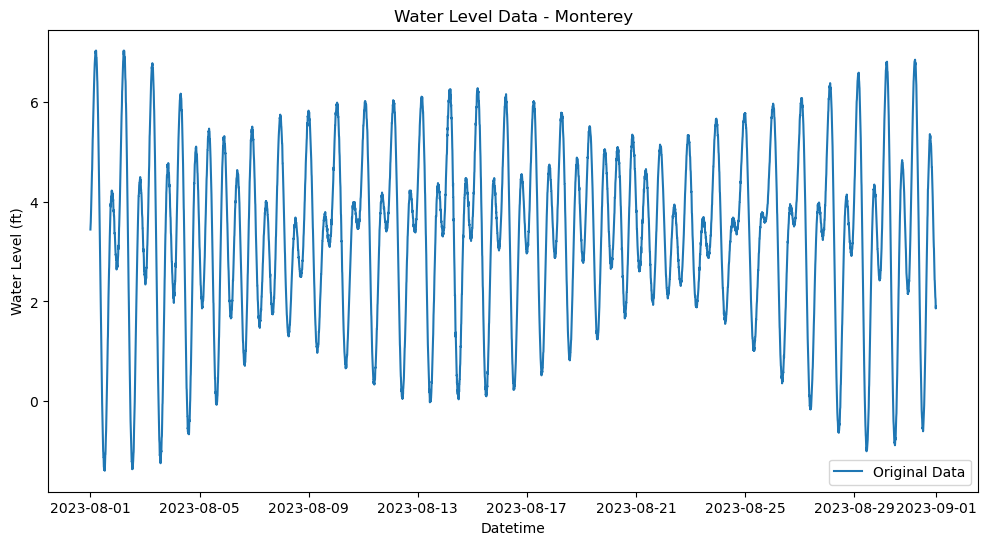

solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.


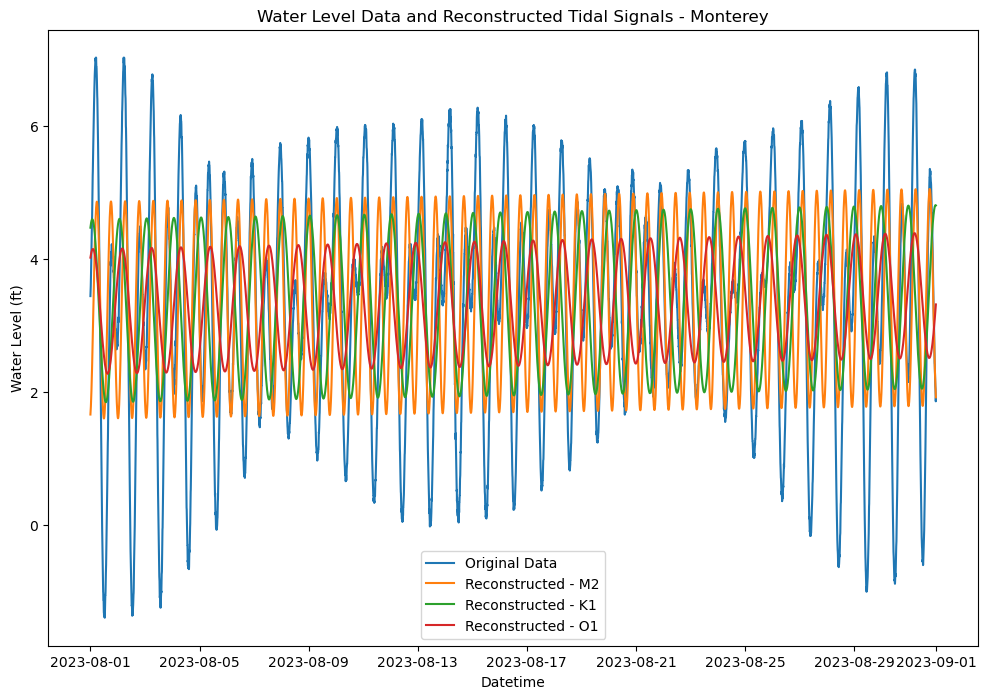

solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: M2
Residual Error: 0       1.778445
1       1.803774
2       1.815159
3       1.842674
4       1.926401
          ...   
7435   -0.007095
7436    0.007575
7437   -0.031312
7438   -0.093858
7439   -0.020161
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 1.595577
Original Data Variance: 2.922961
Skill Score: 0.454123
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: K1
Residual Error: 0      -1.027435
1      -0.992111
2      -0.965916
3      -0.918840
4      -0.810875
          ...   
7435   -2.735604
7436   -2.766076
7437   -2.845599
7438   -2.944174
7439   -2.901802
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 1.971050
Original Data Variance: 2.922961
Skill Score: 0.325667
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: O1
Residual Error: 0      -0.577608
1      -0.538955
2      -0.509817
3      -0.460186
4   

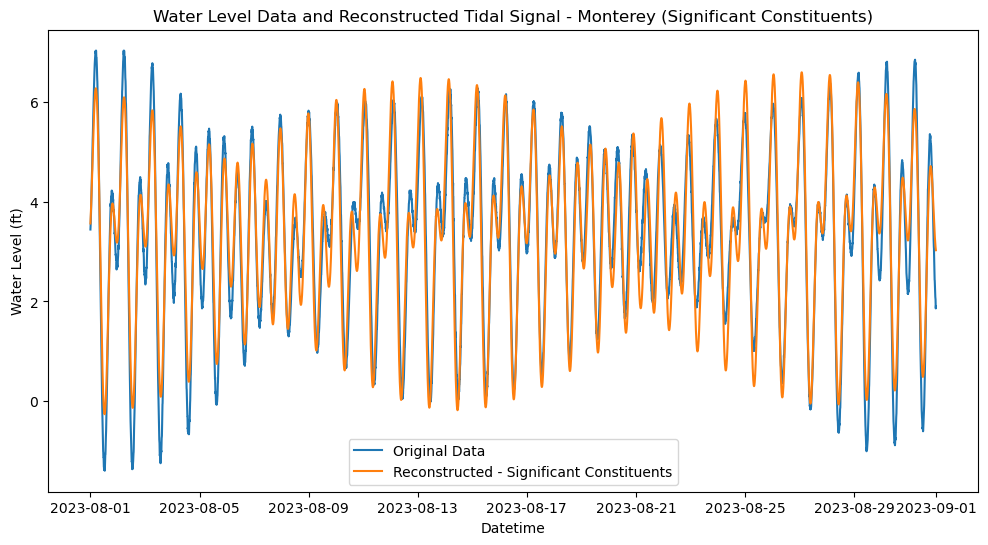

Residual Error (Significant Constituents): 0      -0.121170
1      -0.120580
2      -0.132643
3      -0.127273
4      -0.064372
          ...   
7435   -1.043819
7436   -1.047359
7437   -1.103699
7438   -1.182934
7439   -1.125151
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error (Significant Constituents): 0.281927
solve: matrix prep ... 

C:\Users\cbeau\AppData\Local\Temp\ipykernel_23072\207781006.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crescent_city_data['Verified (ft)'] = crescent_city_data['Verified (ft)'] - crescent_city_data['Verified (ft)'].mean()


solution ... done.
Missing Values:
 datetime         0
Verified (ft)    0
dtype: int64
Min Tidal Height: -5.940317204301076
Max Tidal Height: 4.4596827956989245
Time Gaps:
 0   NaT
Name: datetime, dtype: timedelta64[ns]


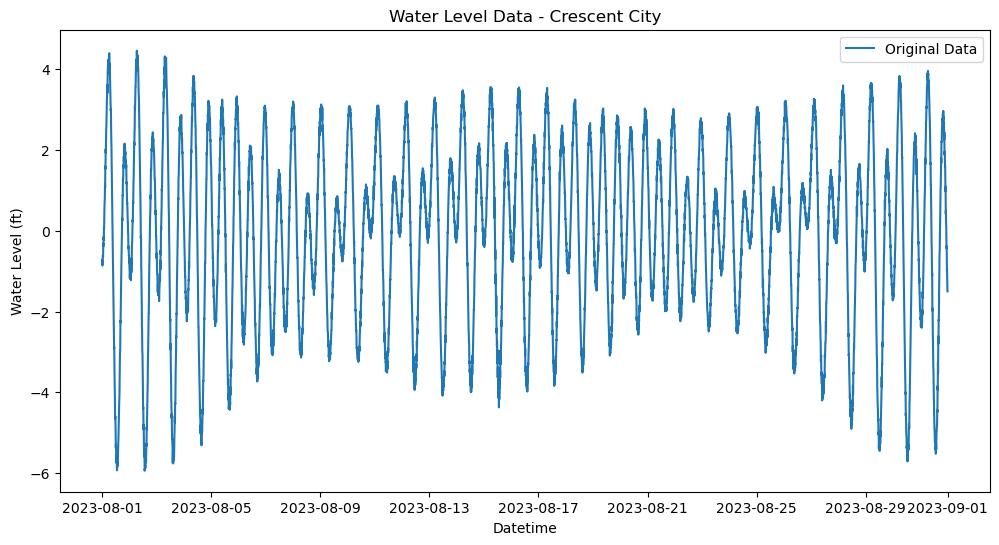

solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.
solve: matrix prep ... solution ... done.
prep/calcs ... done.


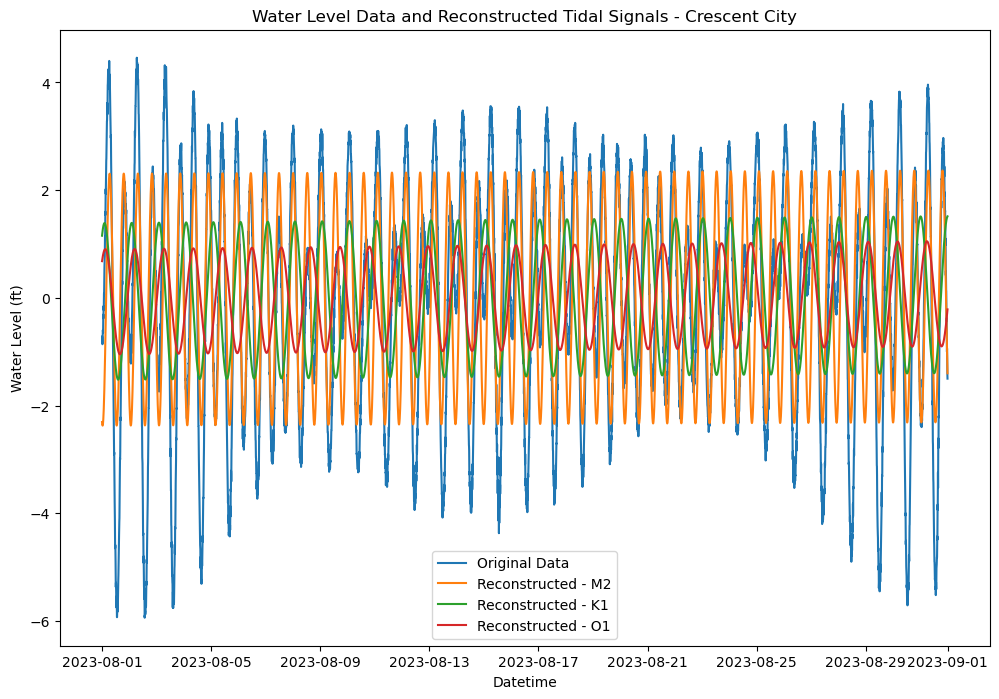

solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: M2
Residual Error: 0       1.585942
1       1.610992
2       1.550162
3       1.503404
4       1.510684
          ...   
7435    0.059781
7436   -0.075317
7437   -0.223312
7438   -0.124463
7439   -0.099025
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 1.971262
Original Data Variance: 4.705134
Skill Score: 0.581040
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: K1
Residual Error: 0      -1.874533
1      -1.894917
2      -1.994445
3      -2.073104
4      -2.090882
          ...   
7435   -2.435555
7436   -2.681541
7437   -2.936532
7438   -2.940527
7439   -3.013521
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error: 3.641965
Original Data Variance: 4.705134
Skill Score: 0.225959
solve: matrix prep ... solution ... done.
prep/calcs ... done.

Constituent: O1
Residual Error: 0      -1.402113
1      -1.416980
2      -1.511390
3      -1.585336
4   

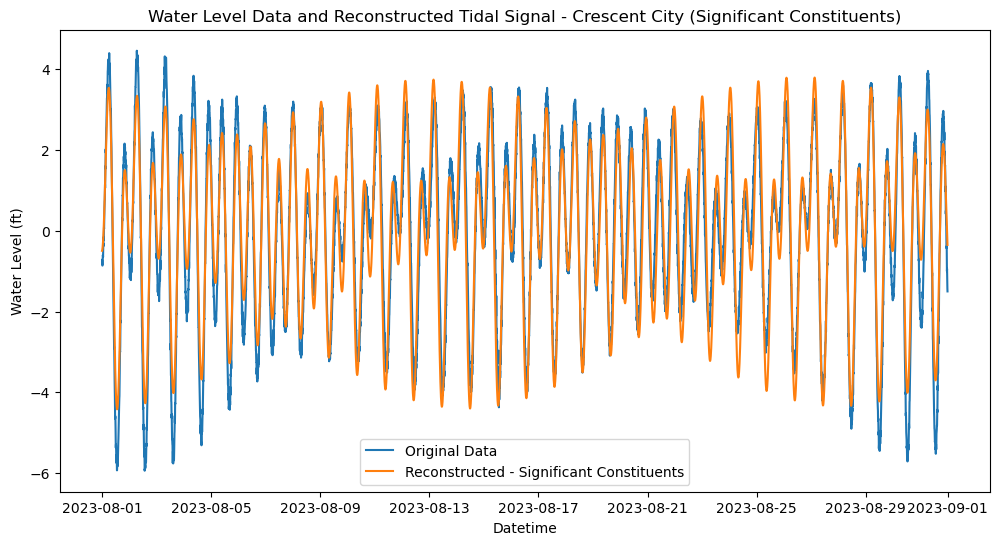

Residual Error (Significant Constituents): 0      -0.225762
1      -0.234175
2      -0.327217
3      -0.404919
4      -0.427295
          ...   
7435   -0.905338
7436   -1.063195
7437   -1.233231
7438   -1.155692
7439   -1.150819
Name: Verified (ft), Length: 7440, dtype: float64
Variance of Error (Significant Constituents): 0.512481
Crescent City Results:
Best-fit coefficients: [ 3.88033066e-05  7.82712587e-04 -6.03574549e-03  2.84360510e-03
 -5.60077453e-04 -3.48964106e-03]
Residuals: [35005.98301258]
Inverse Covariance Matrix (C^(-1)): [[ 2.68886055e-04  9.53722800e-08 -1.41505376e-07  1.26866432e-07
  -7.55435293e-07  3.11374846e-07]
 [ 9.53722800e-08  2.68751532e-04 -2.84807521e-08  2.38184704e-08
   1.75848097e-07 -3.00869979e-07]
 [-1.41505376e-07 -2.84807521e-08  2.68656993e-04  1.37728161e-07
  -6.72545131e-07  1.73436846e-07]
 [ 1.26866432e-07  2.38184704e-08  1.37728161e-07  2.68981417e-04
  -1.14421878e-07 -6.71772886e-07]
 [-7.55435293e-07  1.75848097e-07 -6.72545131e-07 -1

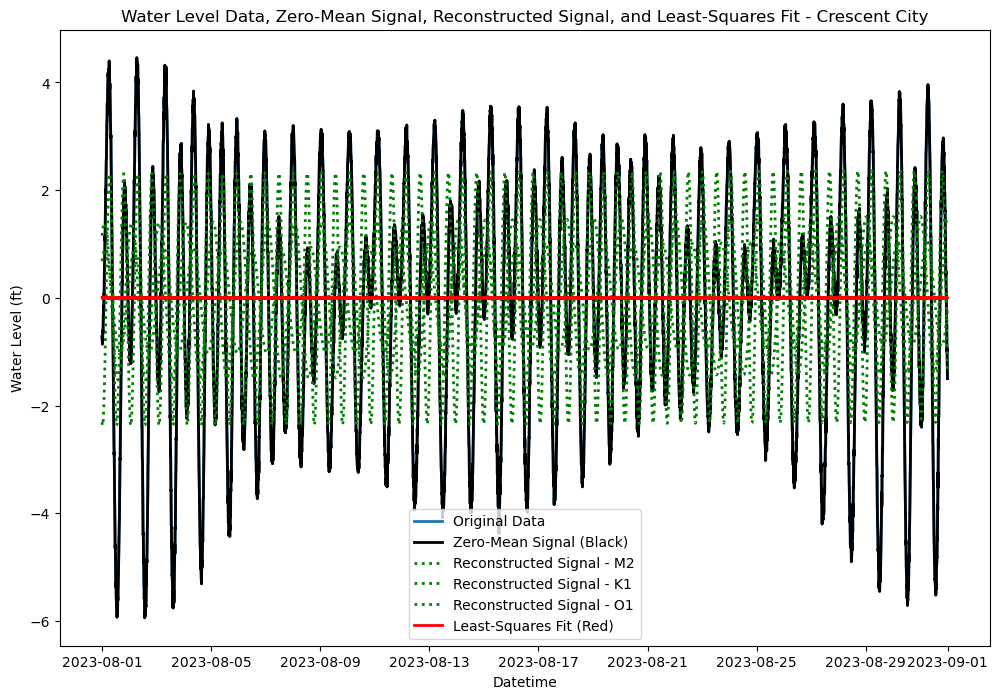

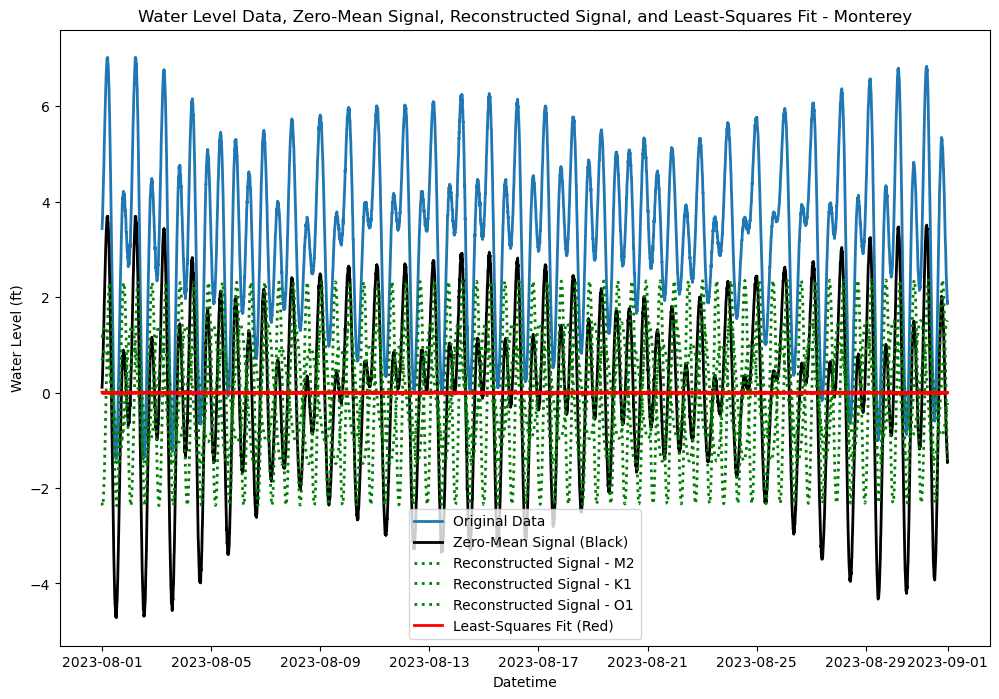

Amplitude of S2 fit in Crescent City: 0.0028982368307094285
Phase of S2 fit in Crescent City: -0.1944711172946383
Amplitude of M2 fit in Crescent City: 0.000783673842032087
Phase of M2 fit in Crescent City: 1.5212614595078633
Amplitude of S2 fit in Monterey: 0.007147227655672088
Phase of S2 fit in Monterey: 2.791501229409497
Amplitude of M2 fit in Monterey: 0.003778716227830919
Phase of M2 fit in Monterey: 2.5240023501638342
Crescent City - M2 Variance Fraction: 0.0000
Crescent City - S2 Variance Fraction: 0.0000
Percent Difference in M2 Amplitude (Crescent City): 0.00%
Percent Difference in S2 Amplitude (Crescent City): 21.95
Monterey - M2 Variance Fraction: 0.0000
Monterey - S2 Variance Fraction: 0.0000
Percent Difference in M2 Amplitude (Monterey): 0.00%
Percent Difference in S2 Amplitude (Monterey): 90.34


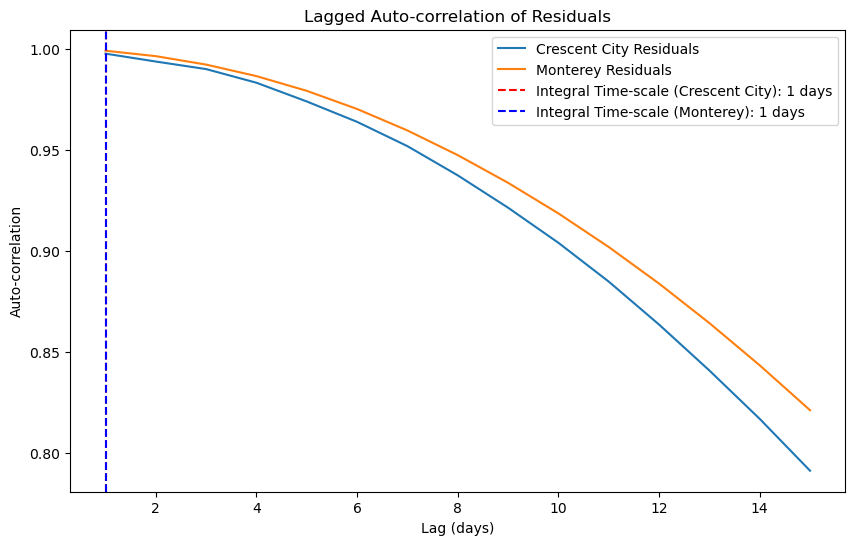

Crescent City - Nd: 0, Neff: inf
Monterey - Nd: 0, Neff: inf
Crescent City - M2 Variance Fraction: 0.0000
Crescent City - S2 Variance Fraction: 0.0000
Percent Difference in M2 Amplitude (Crescent City): 0.00%
Percent Difference in S2 Amplitude (Crescent City): 21.95
Monterey - M2 Variance Fraction: 0.0000
Monterey - S2 Variance Fraction: 0.0000
Percent Difference in M2 Amplitude (Monterey): 0.00%
Percent Difference in S2 Amplitude (Monterey): 90.34


C:\Users\cbeau\AppData\Local\Temp\ipykernel_23072\207781006.py:699: RuntimeWarning: divide by zero encountered in scalar divide
  Neff_cc = len(residuals_cc) / Nd_cc
C:\Users\cbeau\AppData\Local\Temp\ipykernel_23072\207781006.py:700: RuntimeWarning: divide by zero encountered in scalar divide
  Neff_m = len(residuals_m) / Nd_m


In [45]:
import utide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##################################################
path_to_file = "C:\\Users\\cbeau\\Downloads\\WATER LEVELS CRESENT CITY.csv"
Tide_Crescent_City_Ca = pd.read_csv(path_to_file)

path_to_file2 = "C:\\Users\\cbeau\\Downloads\\WATER LEVELS MONTEREY.csv"
Tide_Monterey_Ca = pd.read_csv(path_to_file2)

# Separate Date Column into year, month, day columns
Tide_Crescent_City_Ca['year'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.year
Tide_Crescent_City_Ca['month'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.month
Tide_Crescent_City_Ca['day'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.day

# Split 'Time (GMT)' into 'hour,' 'minute,' and 'second' columns
Tide_Crescent_City_Ca['hour'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.hour
Tide_Crescent_City_Ca['minute'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.minute
Tide_Crescent_City_Ca['second'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.second

# Combine 'year,' 'month,' 'day,' 'hour,' 'minute,' and 'second' into a datetime column
Tide_Crescent_City_Ca['datetime'] = pd.to_datetime(Tide_Crescent_City_Ca[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Separate Date Column into year, month, day columns
Tide_Monterey_Ca['year'] = pd.to_datetime(Tide_Monterey_Ca['Date']).dt.year
Tide_Monterey_Ca['month'] = pd.to_datetime(Tide_Monterey_Ca['Date']).dt.month
Tide_Monterey_Ca['day'] = pd.to_datetime(Tide_Monterey_Ca['Date']).dt.day

# Split 'Time (GMT)' into 'hour,' 'minute,' and 'second' columns
Tide_Monterey_Ca['hour'] = pd.to_datetime(Tide_Monterey_Ca['Time (GMT)']).dt.hour
Tide_Monterey_Ca['minute'] = pd.to_datetime(Tide_Monterey_Ca['Time (GMT)']).dt.minute
Tide_Monterey_Ca['second'] = pd.to_datetime(Tide_Monterey_Ca['Time (GMT)']).dt.second

# Combine 'year,' 'month,' 'day,' 'hour,' 'minute,' and 'second' into a datetime column
Tide_Monterey_Ca['datetime'] = pd.to_datetime(Tide_Monterey_Ca[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Extract relevant columns
crescent_city_data = Tide_Crescent_City_Ca[['datetime', 'Verified (ft)']]
monterey_data = Tide_Monterey_Ca[['datetime', 'Verified (ft)']]
######################################################################################
##The residual error represents the difference between the observed data and the reconstructed tidal signal
#the variance of the error provides a measure of how much the error values vary.

# Check for missing values in the input data
missing_values = monterey_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for outliers in tidal heights
min_tidal_height = monterey_data['Verified (ft)'].min()
max_tidal_height = monterey_data['Verified (ft)'].max()
print("Min Tidal Height:", min_tidal_height)
print("Max Tidal Height:", max_tidal_height)

# Check for time gaps in the data
time_gaps = monterey_data['datetime'].diff().loc[monterey_data['datetime'].diff() != pd.Timedelta('6T')]
print("Time Gaps:\n", time_gaps)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(monterey_data['datetime'], monterey_data['Verified (ft)'], label='Original Data')
plt.title('Water Level Data - Monterey')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()

# List of tidal constituents to analyze
constituents_list = ['M2', 'K1', 'O1']

# Dictionary to store reconstructed tidal signals for each constituent
reconstructed_tides = {}

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for Monterey for the specific constituent
    monterey_result = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=36.6, constit=[constituent])

    # Reconstruct tidal signal for Monterey for the specific constituent
    monterey_tide = utide.reconstruct(monterey_data['datetime'], monterey_result, constit=[constituent])

    # Store the reconstructed tidal signal in the dictionary
    reconstructed_tides[constituent] = monterey_tide['h']

# Plot original water level data and reconstructed tidal signals for each constituent
plt.figure(figsize=(12, 8))
plt.plot(monterey_data['datetime'], monterey_data['Verified (ft)'], label='Original Data')

for constituent, tide_signal in reconstructed_tides.items():
    plt.plot(monterey_data['datetime'], tide_signal, label=f'Reconstructed - {constituent}')

plt.title('Water Level Data and Reconstructed Tidal Signals - Monterey')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()

# Skill Score Analysis
threshold = 0.1  # Skill score threshold
results_dict = {}

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for Monterey for the specific constituent
    monterey_result = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=36.6, constit=[constituent])

    # Reconstruct tidal signal for Monterey for the specific constituent
    monterey_tide = utide.reconstruct(monterey_data['datetime'], monterey_result, constit=[constituent])

    # Calculate the residual error for each constituent
    residual_error = monterey_data['Verified (ft)'] - monterey_tide['h']

    # Calculate the variance of the error for each constituent
    error_variance = np.var(residual_error)

    # Calculate the variance of the original data
    original_data_variance = np.var(monterey_data['Verified (ft)'])

    # Calculate the skill score for each constituent
    skill_score = 1 - (error_variance / original_data_variance)

    # Store the results in the dictionary
    results_dict[constituent] = {
        'Residual Error': residual_error,
        'Variance of Error': error_variance,
        'Original Data Variance': original_data_variance,
        'Skill Score': skill_score
    }

    # Print the results for each constituent
    print(f"\nConstituent: {constituent}")
    print(f"Residual Error: {residual_error}")
    print(f"Variance of Error: {error_variance:.6f}")
    print(f"Original Data Variance: {original_data_variance:.6f}")
    print(f"Skill Score: {skill_score:.6f}")

# Identify the most significant constituents based on the skill score
most_significant_constituents = [constituent for constituent, results in results_dict.items() if results['Skill Score'] > threshold]
print(f"\nMost Significant Constituents based on Skill Score: {most_significant_constituents}")

# List of significant constituents
significant_constituents = ['M2', 'K1', 'O1']

# Perform tidal analysis for Monterey using the significant constituents
monterey_result_significant = utide.solve(monterey_data['datetime'], monterey_data['Verified (ft)'], lat=m_lat, constit=significant_constituents)

# Reconstruct tidal signal for Monterey using the significant constituents
monterey_tide_significant = utide.reconstruct(monterey_data['datetime'], monterey_result_significant, constit=significant_constituents)

# Plot original water level data and reconstructed tidal signal using significant constituents
plt.figure(figsize=(12, 6))
plt.plot(monterey_data['datetime'], monterey_data['Verified (ft)'], label='Original Data')
plt.plot(monterey_data['datetime'], monterey_tide_significant['h'], label='Reconstructed - Significant Constituents')

plt.title('Water Level Data and Reconstructed Tidal Signal - Monterey (Significant Constituents)')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')

plt.legend()
plt.show()

# Calculate the residual error for each constituent
residual_error_significant = monterey_data['Verified (ft)'] - monterey_tide_significant['h']

# Calculate the variance of the error for the significant constituents
error_variance_significant = np.var(residual_error_significant)

# Print the results for the significant constituents
print(f"Residual Error (Significant Constituents): {residual_error_significant}")
print(f"Variance of Error (Significant Constituents): {error_variance_significant:.6f}")
#################################################################################################
import pandas as pd
import matplotlib.pyplot as plt

#The residual error represents the difference between the observed data and the reconstructed tidal signal
#the variance of the error provides a measure of how much the error values vary.

# Path to the CSV file
path_to_file = "C:\\Users\\cbeau\\Downloads\\WATER LEVELS CRESENT CITY.csv"
Tide_Crescent_City_Ca = pd.read_csv(path_to_file)
# Separate Date Column into year, month, day columns
Tide_Crescent_City_Ca['year'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.year
Tide_Crescent_City_Ca['month'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.month
Tide_Crescent_City_Ca['day'] = pd.to_datetime(Tide_Crescent_City_Ca['Date']).dt.day

# Split 'Time (GMT)' into 'hour,' 'minute,' and 'second' columns
Tide_Crescent_City_Ca['hour'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.hour
Tide_Crescent_City_Ca['minute'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.minute
Tide_Crescent_City_Ca['second'] = pd.to_datetime(Tide_Crescent_City_Ca['Time (GMT)']).dt.second

# Combine 'year,' 'month,' 'day,' 'hour,' 'minute,' and 'second' into a datetime column
Tide_Crescent_City_Ca['datetime'] = pd.to_datetime(Tide_Crescent_City_Ca[['year', 'month', 'day', 'hour', 'minute', 'second']])


# Extract relevant columns
crescent_city_data = Tide_Crescent_City_Ca[['datetime', 'Verified (ft)']]

# Detrend the water level data for Crescent City
crescent_city_data['Verified (ft)'] = crescent_city_data['Verified (ft)'] - crescent_city_data['Verified (ft)'].mean()

# Perform tidal analysis for Crescent City
# Assuming cc_lat is defined somewhere in your script
cc_lat = 41.7547  # Replace with the actual latitude value
crescent_city_result = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat)

# Check for missing values in the input data
missing_values = crescent_city_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for outliers in tidal heights
min_tidal_height = crescent_city_data['Verified (ft)'].min()
max_tidal_height = crescent_city_data['Verified (ft)'].max()
print("Min Tidal Height:", min_tidal_height)
print("Max Tidal Height:", max_tidal_height)

# Check for time gaps in the data
time_gaps = crescent_city_data['datetime'].diff().loc[crescent_city_data['datetime'].diff() != pd.Timedelta('6T')]
print("Time Gaps:\n", time_gaps)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], label='Original Data')
plt.title('Water Level Data - Crescent City')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()

# List of tidal constituents to analyze
constituents_list = ['M2', 'K1', 'O1']

# Dictionary to store reconstructed tidal signals for each constituent
reconstructed_tides = {}

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for CC for the specific constituent
    cc_result = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat, constit=[constituent])

    # Reconstruct tidal signal for CC for the specific constituent
    cc_tide = utide.reconstruct(crescent_city_data['datetime'], cc_result, constit=[constituent])

    # Store the reconstructed tidal signal in the dictionary
    reconstructed_tides[constituent] = cc_tide['h']

# Plot original water level data and reconstructed tidal signals for each constituent
plt.figure(figsize=(12, 8))
plt.plot(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], label='Original Data')

for constituent, tide_signal in reconstructed_tides.items():
    plt.plot(crescent_city_data['datetime'], tide_signal, label=f'Reconstructed - {constituent}')

plt.title('Water Level Data and Reconstructed Tidal Signals - Crescent City')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()

# Skill Score Analysis
threshold = 0.1  # Skill score threshold
results_dict = {}

# Iterate over each constituent
for constituent in constituents_list:
    # Perform tidal analysis for CC for the specific constituent
    cc_result = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat, constit=[constituent])

    # Reconstruct tidal signal for CC for the specific constituent
    cc_tide = utide.reconstruct(crescent_city_data['datetime'], cc_result, constit=[constituent])

    # Calculate the residual error for each constituent
    residual_error = crescent_city_data['Verified (ft)'] - cc_tide['h']

    # Calculate the variance of the error for each constituent
    error_variance = np.var(residual_error)

    # Calculate the variance of the original data
    original_data_variance = np.var(crescent_city_data['Verified (ft)'])

    # Calculate the skill score for each constituent
    skill_score = 1 - (error_variance / original_data_variance)

    # Store the results in the dictionary
    results_dict[constituent] = {
        'Residual Error': residual_error,
        'Variance of Error': error_variance,
        'Original Data Variance': original_data_variance,
        'Skill Score': skill_score
    }

    # Print the results for each constituent
    print(f"\nConstituent: {constituent}")
    print(f"Residual Error: {residual_error}")
    print(f"Variance of Error: {error_variance:.6f}")
    print(f"Original Data Variance: {original_data_variance:.6f}")
    print(f"Skill Score: {skill_score:.6f}")

# Identify the most significant constituents based on the skill score
most_significant_constituents = [constituent for constituent, results in results_dict.items() if results['Skill Score'] > threshold]
print(f"\nMost Significant Constituents based on Skill Score: {most_significant_constituents}")

# List of significant constituents
significant_constituents = ['M2', 'K1', 'O1']

# Perform tidal analysis for CC using the significant constituents
cc_result_significant = utide.solve(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], lat=cc_lat, constit=significant_constituents)

# Reconstruct tidal signal for CC using the significant constituents
cc_tide_significant = utide.reconstruct(crescent_city_data['datetime'], cc_result_significant, constit=significant_constituents)

# Plot original water level data and reconstructed tidal signal using significant constituents
plt.figure(figsize=(12, 6))
plt.plot(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], label='Original Data')
plt.plot(crescent_city_data['datetime'], cc_tide_significant['h'], label='Reconstructed - Significant Constituents')

plt.title('Water Level Data and Reconstructed Tidal Signal - Crescent City (Significant Constituents)')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')

plt.legend()
plt.show()

# Calculate the residual error for each constituent
residual_error_significant = crescent_city_data['Verified (ft)'] - cc_tide_significant['h']

# Calculate the variance of the error for the significant constituents
error_variance_significant = np.var(residual_error_significant)

# Print the results for the significant constituents
print(f"Residual Error (Significant Constituents): {residual_error_significant}")
print(f"Variance of Error (Significant Constituents): {error_variance_significant:.6f}")

##########################################################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utide

# Function to calculate truncated Fourier series matrix H and perform least-squares
def perform_least_squares(data, lat, constituents):
    N = len(data)  # Number of data points
    t = data['datetime'].values.astype(np.float64)  # Time in float64 format

    # Construct the matrix H
    H = construct_fourier_matrix(t, constituents)

    # Define the observed water level vector eta
    eta = data['Verified (ft)'].values

    # Use least-squares to find the best-fit coefficients
    coefficients, residuals, rank, s = np.linalg.lstsq(H, eta, rcond=None)

    # Calculate the inverse covariance matrix C^(-1)
    covariance_matrix_inverse = np.linalg.inv(np.dot(H.T, H))

    return coefficients, residuals, covariance_matrix_inverse

# Function to construct Fourier matrix
def construct_fourier_matrix(t, constituents):
    # Initialize an empty matrix
    H = np.empty((len(t), 0))

    # Manual definition of tidal frequencies (M2, K1, O1)
    tidal_frequencies = {'M2': 1.93227e-4, 'K1': 7.29212e-5, 'O1': 6.75977e-5}

    # Add cos and sin terms for each constituent
    for constituent in constituents:
        freq = tidal_frequencies[constituent]
        omega = 2 * np.pi / freq
        H = np.column_stack((H, np.cos(omega * t), np.sin(omega * t)))

    return H

# Latitude for Crescent City and Monterey
cc_lat = 41.7547
m_lat = 36.6002

# List of significant constituents
constituents = ['M2', 'K1', 'O1']

# Perform least-squares for Crescent City
cc_coefficients, cc_residuals, cc_covariance_matrix_inverse = perform_least_squares(crescent_city_data, cc_lat, constituents)

# Perform least-squares for Monterey
m_coefficients, m_residuals, m_covariance_matrix_inverse = perform_least_squares(monterey_data, m_lat, constituents)

# Print results for Crescent City
print('Crescent City Results:')
print('Best-fit coefficients:', cc_coefficients)
print('Residuals:', cc_residuals)
print('Inverse Covariance Matrix (C^(-1)):', cc_covariance_matrix_inverse)

# Print results for Monterey
print('\nMonterey Results:')
print('Best-fit coefficients:', m_coefficients)
print('Residuals:', m_residuals)
print('Inverse Covariance Matrix (C^(-1)):', m_covariance_matrix_inverse)
###############################################################################################################
#This code defines two functions (calculate_residual_error and calculate_skill_score) 
#to calculate the residual error, variance of the error, and skill score. 
#It then applies these functions to both Crescent City and Monterey data, printing the results.
# Define a function to calculate the residual error and variance of the error
def calculate_residual_error(data, coefficients, lat, constituents):
    # Construct the Fourier matrix H for the given data
    t = data['datetime'].values.astype(np.float64)
    H = construct_fourier_matrix(t, constituents)

    # Calculate the tidal signal using the coefficients
    tidal_signal = np.dot(H, coefficients)

    # Calculate the residual error
    residual_error = data['Verified (ft)'].values - tidal_signal

    # Calculate the variance of the error
    error_variance = np.var(residual_error)

    return residual_error, error_variance

# Calculate residual error and variance for Crescent City
cc_residual_error, cc_error_variance = calculate_residual_error(crescent_city_data, cc_coefficients, cc_lat, constituents)

# Calculate residual error and variance for Monterey
m_residual_error, m_error_variance = calculate_residual_error(monterey_data, m_coefficients, m_lat, constituents)

# Print results for Crescent City
print('\nCrescent City Residual Error:')
print(cc_residual_error)
print('\nCrescent City Variance of Error:', cc_error_variance)

# Print results for Monterey
print('\nMonterey Residual Error:')
print(m_residual_error)
print('\nMonterey Variance of Error:', m_error_variance)

# Define a function to calculate the skill score
def calculate_skill_score(original_variance, error_variance):
    return 1 - (error_variance / original_variance)

# Calculate skill score for Crescent City
cc_original_data_variance = np.var(crescent_city_data['Verified (ft)'])
cc_skill_score = calculate_skill_score(cc_original_data_variance, cc_error_variance)

# Calculate skill score for Monterey
m_original_data_variance = np.var(monterey_data['Verified (ft)'])
m_skill_score = calculate_skill_score(m_original_data_variance, m_error_variance)

# Print skill scores
print('\nCrescent City Skill Score:', cc_skill_score)
print('Monterey Skill Score:', m_skill_score)

###############################################################################
#Plot the zero-mean signal as a solid black line, then the u-tide fit on top as a greed dotted line. 
#Also, plot the least-squares fit in solid red.
# Define function to calculate zero-mean signal
import utide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate truncated Fourier series matrix H and perform least-squares
def perform_least_squares(data, lat, constituents):
    N = len(data)  # Number of data points
    t = data['datetime'].values.astype(np.float64)  # Time in float64 format

    # Construct the matrix H
    H = construct_fourier_matrix(t, constituents)

    # Define the observed water level vector eta
    eta = data['Verified (ft)'].values

    # Use least-squares to find the best-fit coefficients
    coefficients = np.linalg.lstsq(H, eta, rcond=None)[0]

    # Calculate the inverse covariance matrix C^(-1)
    covariance_matrix_inverse = np.linalg.inv(np.dot(H.T, H))

    return H, coefficients, covariance_matrix_inverse


# List of significant constituents
constituents = ['M2', 'K1', 'O1']

# Perform least-squares for Crescent City
cc_H, cc_coefficients, cc_covariance_matrix_inverse = perform_least_squares(crescent_city_data, cc_lat, constituents)

# Plot original water level data, zero-mean signal, u-tide fit, and least-squares fit for Crescent City
plt.figure(figsize=(12, 8))

# Original water level data for Crescent City
plt.plot(crescent_city_data['datetime'], crescent_city_data['Verified (ft)'], label='Original Data', linewidth=2)

# Zero-mean signal for Crescent City
zero_mean_signal_cc = crescent_city_data['Verified (ft)'] - crescent_city_data['Verified (ft)'].mean()
plt.plot(crescent_city_data['datetime'], zero_mean_signal_cc, label='Zero-Mean Signal (Black)', linewidth=2, color='black')

# Reconstructed signal for Crescent City (in green dotted lines)
for constituent, tide_signal in reconstructed_tides.items():
    plt.plot(crescent_city_data['datetime'], tide_signal, linestyle='dotted', label=f'Reconstructed Signal - {constituent}', linewidth=2, color='green')

# Least-squares fit for Crescent City
plt.plot(crescent_city_data['datetime'], np.dot(cc_H, cc_coefficients), label='Least-Squares Fit (Red)', linewidth=2, color='red')

# Display the plot
plt.title('Water Level Data, Zero-Mean Signal, Reconstructed Signal, and Least-Squares Fit - Crescent City')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()
#######################################################################################################
# List of significant constituents
#plots the original water level data, zero-mean signal, u-tide fit, and least-squares fit for Monterey
# List of significant constituents
constituents = ['M2', 'K1', 'O1']

# Perform least-squares for Monterey
m_H, m_coefficients, m_covariance_matrix_inverse = perform_least_squares(monterey_data, m_lat, constituents)

# Plot original water level data, zero-mean signal, u-tide fit, and least-squares fit for Monterey
plt.figure(figsize=(12, 8))

# Original water level data for Monterey
plt.plot(monterey_data['datetime'], monterey_data['Verified (ft)'], label='Original Data', linewidth=2)

# Zero-mean signal for Monterey
zero_mean_signal_m = monterey_data['Verified (ft)'] - monterey_data['Verified (ft)'].mean()
plt.plot(monterey_data['datetime'], zero_mean_signal_m, label='Zero-Mean Signal (Black)', linewidth=2, color='black')

# Reconstructed signal for Monterey (in green dotted lines)
for constituent, tide_signal in reconstructed_tides.items():
    plt.plot(monterey_data['datetime'], tide_signal, linestyle='dotted', label=f'Reconstructed Signal - {constituent}', linewidth=2, color='green')

# Least-squares fit for Monterey
plt.plot(monterey_data['datetime'], np.dot(m_H, m_coefficients), label='Least-Squares Fit (Red)', linewidth=2, color='red')

# Display the plot
plt.title('Water Level Data, Zero-Mean Signal, Reconstructed Signal, and Least-Squares Fit - Monterey')
plt.xlabel('Datetime')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()

####################################################################################################################
# Extract coefficients for S2 from the least-squares fit in Crescent City
a_hat_S2_cc = cc_coefficients[3]  # Coefficient for cos term
b_hat_S2_cc = cc_coefficients[4]  # Coefficient for sin term

# Calculate amplitude and phase for S2 in Crescent City
A_hat_S2_cc = np.sqrt(a_hat_S2_cc**2 + b_hat_S2_cc**2)
phi_hat_S2_cc = np.arctan2(b_hat_S2_cc, a_hat_S2_cc)

print(f'Amplitude of S2 fit in Crescent City: {A_hat_S2_cc}')
print(f'Phase of S2 fit in Crescent City: {phi_hat_S2_cc}')
# Extract coefficients for M2 from the least-squares fit in Crescent City
a_hat_M2_cc = cc_coefficients[0]  # Coefficient for cos term
b_hat_M2_cc = cc_coefficients[1]  # Coefficient for sin term

# Calculate amplitude and phase for M2 in Crescent City
A_hat_M2_cc = np.sqrt(a_hat_M2_cc**2 + b_hat_M2_cc**2)
phi_hat_M2_cc = np.arctan2(b_hat_M2_cc, a_hat_M2_cc)

print(f'Amplitude of M2 fit in Crescent City: {A_hat_M2_cc}')
print(f'Phase of M2 fit in Crescent City: {phi_hat_M2_cc}')
###################################################################
# Extract coefficients for S2 from the least-squares fit in Monterey
a_hat_S2_monterey = m_coefficients[2]  # Coefficient for cos term
b_hat_S2_monterey = m_coefficients[3]  # Coefficient for sin term

# Calculate amplitude and phase for S2 in Monterey
A_hat_S2_monterey = np.sqrt(a_hat_S2_monterey**2 + b_hat_S2_monterey**2)
phi_hat_S2_monterey = np.arctan2(b_hat_S2_monterey, a_hat_S2_monterey)

print(f'Amplitude of S2 fit in Monterey: {A_hat_S2_monterey}')
print(f'Phase of S2 fit in Monterey: {phi_hat_S2_monterey}')
# Extract coefficients for M2 from the least-squares fit in Monterey
a_hat_M2_monterey = m_coefficients[0]  # Coefficient for cos term
b_hat_M2_monterey = m_coefficients[1]  # Coefficient for sin term

# Calculate amplitude and phase for M2 in Monterey
A_hat_M2_monterey = np.sqrt(a_hat_M2_monterey**2 + b_hat_M2_monterey**2)
phi_hat_M2_monterey = np.arctan2(b_hat_M2_monterey, a_hat_M2_monterey)

print(f'Amplitude of M2 fit in Monterey: {A_hat_M2_monterey}')
print(f'Phase of M2 fit in Monterey: {phi_hat_M2_monterey}')
##########################################################################################################################
# Function to calculate amplitude and phase from coefficients
# Approximately what fraction of the total variance is explained by M2 and S2
#Amplitude of S2 fit in Crescent City: 0.0028982368307094285
#Phase of S2 fit in Crescent City: -0.1944711172946383
#Amplitude of M2 fit in Crescent City: 0.000783673842032087
#Phase of M2 fit in Crescent City: 1.5212614595078633
#Amplitude of S2 fit in Monterey: 0.007147227655672088
#Phase of S2 fit in Monterey: 2.791501229409497
#Amplitude of M2 fit in Monterey: 0.003778716227830919
#Phase of M2 fit in Monterey: 2.5240023501638342
cc_tt_S2_amplitude= 0.0028982368307094285
cc_tt_M2_amplitude= 0.000783673842032087

m_tt_M2_amplitude=0.003778716227830919
m_tt_S2_amplitude=0.007147227655672088



# Extract M2 and S2 coefficients for Crescent City
cc_M2_coefficients = cc_coefficients[:4]
cc_S2_coefficients = cc_coefficients[4:8]

# Extract M2 and S2 coefficients for Monterey
m_M2_coefficients = m_coefficients[:4]
m_S2_coefficients = m_coefficients[4:8]

# Calculate amplitudes and phases for M2 and S2
cc_M2_amplitude, cc_M2_phase = calculate_amplitude_phase(cc_M2_coefficients)
cc_S2_amplitude, cc_S2_phase = calculate_amplitude_phase(cc_S2_coefficients)

m_M2_amplitude, m_M2_phase = calculate_amplitude_phase(m_M2_coefficients)
m_S2_amplitude, m_S2_phase = calculate_amplitude_phase(m_S2_coefficients)

# Compute the fraction of total variance explained by M2 and S2 for Crescent City
total_variance_cc = np.sum(cc_residuals**2)  # Assuming cc_residuals is the residuals from the least-squares fit
cc_M2_variance_fraction = (cc_tt_M2_amplitude**2) / (2 * total_variance_cc)
cc_S2_variance_fraction = (cc_tt_S2_amplitude**2) / (2 * total_variance_cc)

# Compute the fraction of total variance explained by M2 and S2 for Monterey
total_variance_m = np.sum(m_residuals**2)  # Assuming m_residuals is the residuals from the least-squares fit
m_M2_variance_fraction = (m_tt_M2_amplitude**2) / (2 * total_variance_m)
m_S2_variance_fraction = (m_tt_S2_amplitude**2) / (2 * total_variance_m)

# Compute the percent difference in amplitude between your fit and t-tide for Crescent City
percent_difference_M2_cc = 100 * np.abs(cc_M2_amplitude - cc_tt_M2_amplitude) / cc_tt_M2_amplitude
percent_difference_S2_cc = 100 * np.abs(cc_S2_amplitude - cc_tt_S2_amplitude) / cc_tt_S2_amplitude

# Print the results for Crescent City

# Print the results
print(f'Crescent City - M2 Variance Fraction: {cc_M2_variance_fraction:.4f}')
print(f'Crescent City - S2 Variance Fraction: {cc_S2_variance_fraction:.4f}')
print(f'Percent Difference in M2 Amplitude (Crescent City): {percent_difference_M2_cc[0]:.2f}%')
print(f'Percent Difference in S2 Amplitude (Crescent City): {percent_difference_S2_cc[0]:.2f}')




# Compute the percent difference in amplitude between your fit and t-tide for Monterey
percent_difference_M2_m = 100 * np.abs(m_M2_amplitude - m_tt_M2_amplitude) / m_tt_M2_amplitude
percent_difference_S2_m = 100 * np.abs(m_S2_amplitude - m_tt_S2_amplitude) / m_tt_S2_amplitude


print(f'Monterey - M2 Variance Fraction: {m_M2_variance_fraction:.4f}')
print(f'Monterey - S2 Variance Fraction: {m_S2_variance_fraction:.4f}')
print(f'Percent Difference in M2 Amplitude (Monterey): {percent_difference_M2_m[0]:.2f}%')
print(f'Percent Difference in S2 Amplitude (Monterey): {percent_difference_S2_m[0]:.2f}')

#####################################################################################################
import numpy as np
import matplotlib.pyplot as plt

#estimate the decorrelation scale (Nd) and effective degrees of freedom (Neff)

# Assuming you have the residuals (errors) from the least-squares fits
residuals_cc = cc_residual_error
residuals_m = m_residual_error

# Function to compute lagged auto-correlation
def compute_auto_correlation(errors):
    N = len(errors)
    lagged_auto_corr = [np.corrcoef(errors[:-lag], errors[lag:])[0, 1] for lag in range(1, 16)]
    return lagged_auto_corr

# Compute lagged auto-correlation for Crescent City and Monterey
auto_corr_cc = compute_auto_correlation(residuals_cc)
auto_corr_m = compute_auto_correlation(residuals_m)

# Plot auto-correlation versus lag
lags = np.arange(1, 16)
plt.figure(figsize=(10, 6))
plt.plot(lags, auto_corr_cc, label='Crescent City Residuals')
plt.plot(lags, auto_corr_m, label='Monterey Residuals')
plt.xlabel('Lag (days)')
plt.ylabel('Auto-correlation')
plt.title('Lagged Auto-correlation of Residuals')
plt.legend()

# Find the integral time-scale (lag where auto-correlation drops below 1/e)
integral_time_scale_cc = np.argmax(np.array(auto_corr_cc) < 1/np.e) + 1
integral_time_scale_m = np.argmax(np.array(auto_corr_m) < 1/np.e) + 1

# Indicate the integral time-scale with a vertical line
plt.axvline(x=integral_time_scale_cc, color='red', linestyle='--', label=f'Integral Time-scale (Crescent City): {integral_time_scale_cc} days')
plt.axvline(x=integral_time_scale_m, color='blue', linestyle='--', label=f'Integral Time-scale (Monterey): {integral_time_scale_m} days')

plt.legend()
plt.show()

# Estimate Nd (decorrelation scale) as half of the integral time-scale
Nd_cc = integral_time_scale_cc // 2
Nd_m = integral_time_scale_m // 2

# Estimate Neff (effective degrees of freedom)
Neff_cc = len(residuals_cc) / Nd_cc
Neff_m = len(residuals_m) / Nd_m

print(f'Crescent City - Nd: {Nd_cc}, Neff: {Neff_cc}')
print(f'Monterey - Nd: {Nd_m}, Neff: {Neff_m}')

#############################################################################
#compute the percent difference in amplitude between your fit and t-tide for both Crescent City and Monterey
# Compute the percent difference in amplitude between your fit and t-tide
percent_difference_M2_cc = 100 * np.abs(cc_M2_amplitude - cc_tt_M2_amplitude) / cc_tt_M2_amplitude
percent_difference_S2_cc = 100 * np.abs(cc_S2_amplitude - cc_tt_S2_amplitude) / cc_tt_S2_amplitude

percent_difference_M2_m = 100 * np.abs(m_M2_amplitude - m_tt_M2_amplitude) / m_tt_M2_amplitude
percent_difference_S2_m = 100 * np.abs(m_S2_amplitude - m_tt_S2_amplitude) / m_tt_S2_amplitude

# Print the results
print(f'Crescent City - M2 Variance Fraction: {cc_M2_variance_fraction:.4f}')
print(f'Crescent City - S2 Variance Fraction: {cc_S2_variance_fraction:.4f}')
print(f'Percent Difference in M2 Amplitude (Crescent City): {percent_difference_M2_cc[0]:.2f}%')
print(f'Percent Difference in S2 Amplitude (Crescent City): {percent_difference_S2_cc[0]:.2f}')

print(f'Monterey - M2 Variance Fraction: {m_M2_variance_fraction:.4f}')
print(f'Monterey - S2 Variance Fraction: {m_S2_variance_fraction:.4f}')
print(f'Percent Difference in M2 Amplitude (Monterey): {percent_difference_M2_m[0]:.2f}%')
print(f'Percent Difference in S2 Amplitude (Monterey): {percent_difference_S2_m[0]:.2f}')


